In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from datetime import date
import pandas_datareader as web
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import os  
import glob 
import warnings

warnings.filterwarnings("ignore")

# Add Price Change for Stock Price

In [2]:
print(os.getcwd())  

C:\Users\eikde\source\repos\help-dissertation


In [3]:
directory = "Data\Stocks"

all_data = pd.DataFrame()

for filename in os.listdir(directory):  
    if filename.endswith(".csv"):    
        quote = filename.split(".")[0]
        data = pd.read_csv(r"Data/Stocks/{0}".format(filename), sep="\t")  
        data['Date'] = data['Date'].apply(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
        ClosingPrice = data[['Adj Close']]
        data['pct_change'] = ClosingPrice.pct_change()*100
        data['quote'] = quote
        
        all_data = all_data.append(data, ignore_index=True)
        
        data.to_csv(r"Data/Stocks_WithPriceChange/{0}".format(filename), sep="\t")

In [4]:
all_data = all_data.drop(['Unnamed: 0'], axis=1)
all_data = all_data.rename(columns={'Date':'date'})
#all_data = all_data.set_index('date')
all_data.head()

,date,High,Low,Open,Close,Volume,Adj Close,pct_change,quote
0,2019-07-01,3.540,3.510,3.510,3.530,98400.0,3.479728,NaN,0097
1,2019-07-02,3.535,3.525,3.535,3.530,126200.0,3.479728,0.000000,0097
2,2019-07-03,3.515,3.500,3.515,3.510,32400.0,3.460013,-0.566562,0097
3,2019-07-04,3.500,3.480,3.500,3.495,22800.0,3.445226,-0.427367,0097
4,2019-07-05,3.500,3.475,3.485,3.495,20600.0,3.445226,0.000000,0097


In [5]:
def plot_xy(ax,x, data, title):
    # first plot crypto news vs price change
    ax[x].plot(data.index, data['sentiment_score'], color="red", marker="o")
    # set x-axis label
    ax[x].set_xlabel("Date",fontsize=14)
    #ax[x,y].set_xticklabels(data.index, rotation=45)
    # set y-axis label
    ax[x].set_ylabel("Sentiment score",color="red",fontsize=14)
    ax[x].set_title(title, fontsize=14)
    # twin object for two different y-axis on the sample plot
    ax2=ax[x].twinx()
    # make a plot with different y-axis using second axis object
    ax2.plot(data.index, data['pct_change'],color="blue",marker="o")
    ax2.set_ylabel("Daily Percentage Change",color="blue",fontsize=14)

In [2]:
def sentiment_price_corr(data):
    # Compute the correlation matrix
    # plotting correlation heatmap
    fig, ax = plt.subplots(figsize=(10, 10))
    dataplot = sns.heatmap(data.corr(), annot=True,linewidths=.5)

In [31]:
data_lagged = pd.read_excel(r"Data/sentiment_result/KLCI_sentiment_overview.xlsx", sheet_name="Lagged") 

In [32]:
data_standard = pd.read_excel(r"Data/sentiment_result/KLCI_sentiment_overview.xlsx", sheet_name="Normal") 

In [33]:
data_mixed = pd.read_excel(r"Data/sentiment_result/KLCI_sentiment_overview.xlsx", sheet_name="Mixed") 

In [34]:
data_lagged

,Date,pct_change,Axiata,Bank Negara Malaysia,Bumi Armada,CIMB,Construction,Consumer,Covid-19 Malaysia,Digi,...,Technology,Telecommunication,Tenaga,Topglove,Transportation,UOA,Utilities,Vitrox,Yinson,YTL
0,2019-07-02,0.438341,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000
1,2019-07-03,-0.056177,0.000000,0.000000,0.0,0.0,0.0,0.500473,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000
2,2019-07-04,-0.152071,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000
3,2019-07-05,-0.293334,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,-0.95691
4,2019-07-08,-0.290635,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.924298,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,2021-06-25,0.255195,0.000000,0.000000,0.0,0.0,0.0,-0.722166,0.0,0.911138,...,0.0,0.0,0.0,0.0,0.621993,0.0,0.0,0.0,0.000000,0.00000
487,2021-06-28,-0.959818,0.911138,-0.952569,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000
488,2021-06-29,0.233060,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000
489,2021-06-30,-1.012721,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000


In [35]:
data_lagged = data_lagged.set_index('Date')
data_lagged.head()

data_standard = data_standard.set_index('Date')
data_standard.head()

data_mixed = data_mixed.set_index('date')
data_mixed.head()

,pct_change,sentiment,lagged_sentiment
date,,,
2019-07-02,0.438341,0.512530,0.906951
2019-07-03,-0.056177,0.000000,0.902186
2019-07-04,-0.152071,0.579440,0.512530
2019-07-05,-0.293334,-0.726995,0.579440
2019-07-07,0.000000,0.000000,-0.726995


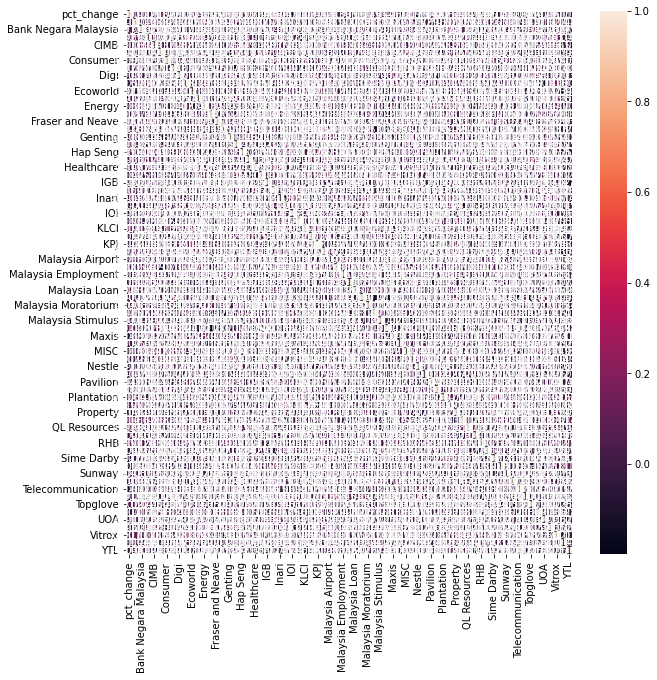

In [89]:
sentiment_price_corr(data_standard)

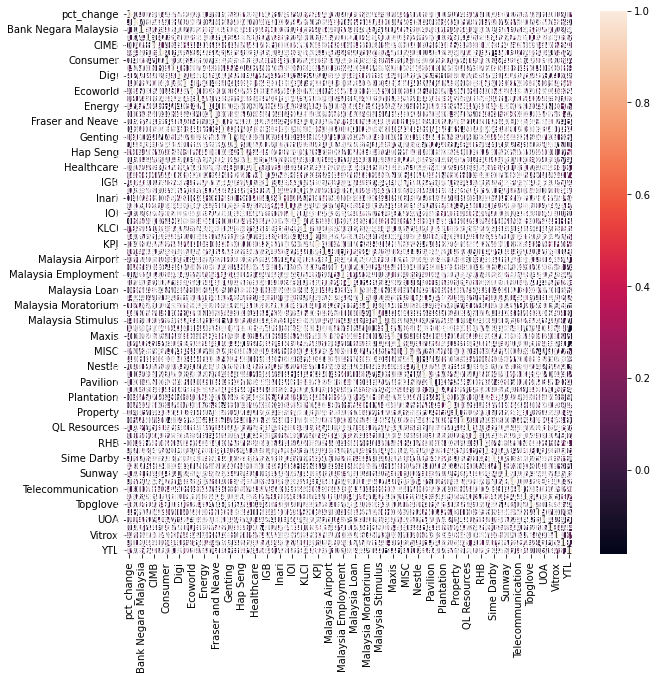

In [90]:
sentiment_price_corr(data_lagged)

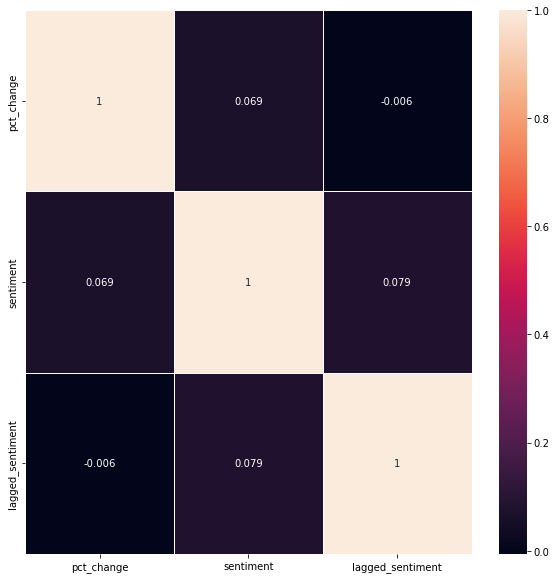

In [36]:
sentiment_price_corr(data_mixed)

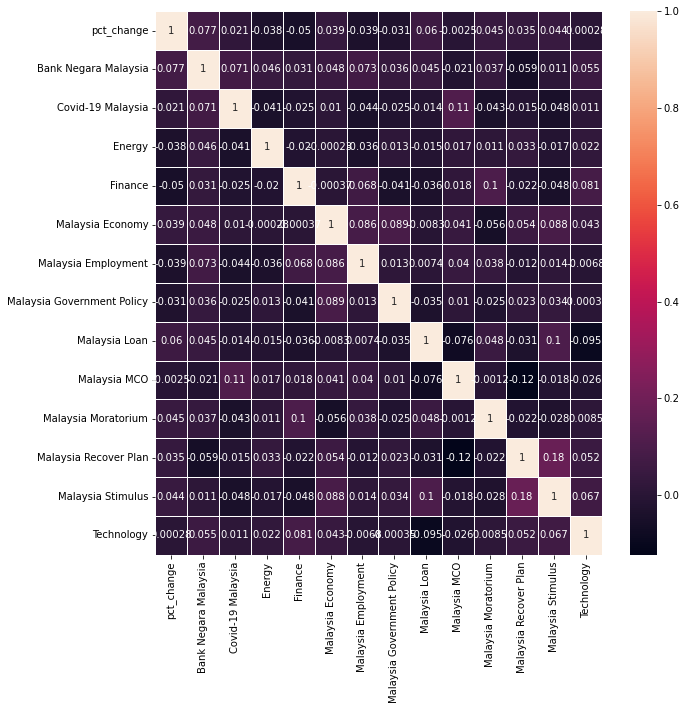

In [91]:
limit_data_standard = data_standard[['pct_change','Bank Negara Malaysia','Covid-19 Malaysia',
                                     'Energy','Finance','Malaysia Economy','Malaysia Employment',
                                     'Malaysia Government Policy','Malaysia Loan','Malaysia MCO',
                                     'Malaysia Moratorium', 'Malaysia Recover Plan', 'Malaysia Stimulus',
                                     'Technology']]
sentiment_price_corr(limit_data_standard)

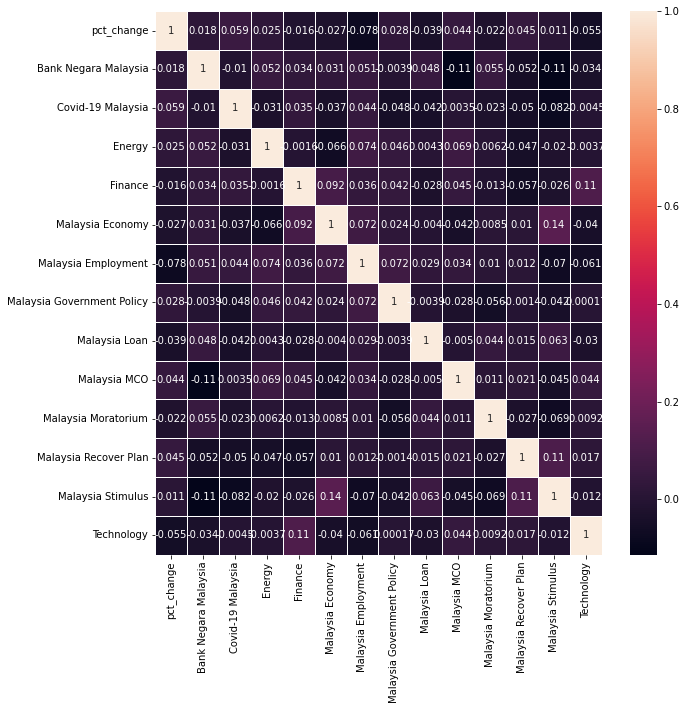

In [92]:
limit_data_lagged = data_lagged[['pct_change','Bank Negara Malaysia','Covid-19 Malaysia',
                                     'Energy','Finance','Malaysia Economy','Malaysia Employment',
                                     'Malaysia Government Policy','Malaysia Loan','Malaysia MCO',
                                     'Malaysia Moratorium', 'Malaysia Recover Plan', 'Malaysia Stimulus',
                                     'Technology']]
sentiment_price_corr(limit_data_lagged)

In [25]:
health_data = pd.read_excel(r"Data/sentiment_result/Health_sentiment_overview.xlsx", sheet_name="Overall")

In [26]:
start = dt.datetime(2020,1,1)
end = dt.datetime(2020,12,31)

health_data = health_data[(health_data['Date'] >= start) & (health_data['Date'] <= end)]
health_data = health_data.set_index('Date')
health_data.head()

,IHH,KPJ,Hartalega,TopGlove,Kossan,mean_sentiment,mean_sentiment_lagged
Date,,,,,,,
2020-01-02,1.828160,1.587295,-2.372279,-1.063795,0.000000,0.381051,0.391544
2020-01-03,0.897656,0.000000,0.934602,0.430055,-0.240376,-0.124518,0.545451
2020-01-06,-1.245550,-0.520821,-0.925948,-0.214115,0.000000,0.157041,-0.111689
2020-01-07,0.900900,0.523547,2.429923,-0.214557,2.427174,-0.235964,-0.017833
2020-01-08,-0.892856,-0.520821,-1.459849,-0.860258,-0.473935,-0.031331,0.125875


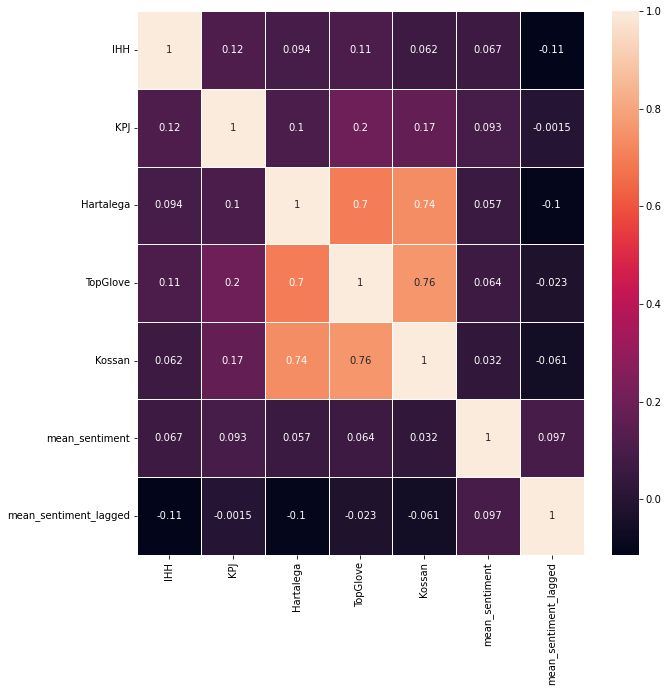

In [27]:
sentiment_price_corr(health_data)

In [28]:
health_data_details = pd.read_excel(r"Data/sentiment_result/Health_sentiment_overview.xlsx", sheet_name="Details")

In [29]:
start = dt.datetime(2020,1,1)
end = dt.datetime(2020,12,31)

health_data_details = health_data_details[(health_data_details['Date'] >= start) & (health_data_details['Date'] <= end)]
health_data_details = health_data_details.set_index('Date')
health_data_details.head()

,IHH,KPJ,Hartalega,TopGlove,Kossan,Bank Negara Malaysia,Covid-19 Malaysia,Hartalega.1,Healthcare,IHH.1,Kossan.1,KPJ.1,Malaysia Economy,Malaysia Employment,Malaysia Government Policy,Malaysia Loan,Malaysia MCO,Malaysia Moratorium,Malaysia Recover Plan,Malaysia Stimulus
Date,,,,,,,,,,,,,,,,,,,,
2020-01-02,1.828160,1.587295,-2.372279,-1.063795,0.000000,0.261956,0.0,0.000000,0.075550,0.118223,0.853878,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0
2020-01-03,0.897656,0.000000,0.934602,0.430055,-0.240376,-0.620632,0.0,0.047257,0.000000,0.028047,0.047257,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0
2020-01-06,-1.245550,-0.520821,-0.925948,-0.214115,0.000000,0.494941,0.0,0.000000,0.000000,0.000000,0.077571,0.026488,0.0,0.000000,0.0,0.029166,0.0,0.000000,0.0,0.0
2020-01-07,0.900900,0.523547,2.429923,-0.214557,2.427174,0.000000,0.0,0.000000,0.447333,0.000000,0.000000,0.000000,0.0,-0.786153,0.0,0.000000,0.0,-0.369073,0.0,0.0
2020-01-08,-0.892856,-0.520821,-1.459849,-0.860258,-0.473935,0.000000,0.0,0.035621,-0.253267,0.068113,0.009013,0.000000,0.0,0.000000,0.0,-0.016133,0.0,0.000000,0.0,0.0


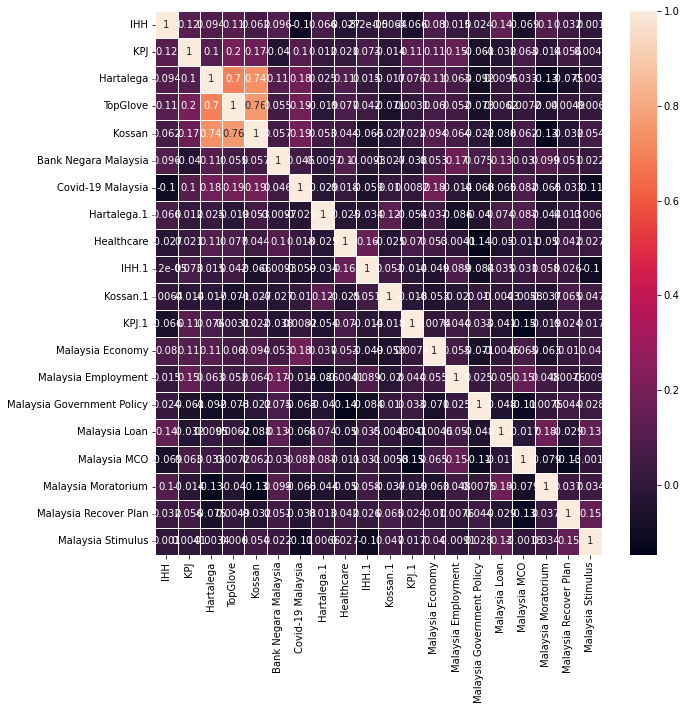

In [30]:
sentiment_price_corr(health_data_details)

In [33]:
finance_data = pd.read_excel(r"Data/sentiment_result/Finance_sentiment_overview.xlsx", sheet_name="Overall")

In [34]:
start = dt.datetime(2020,1,1)
end = dt.datetime(2020,12,31)

finance_data = finance_data[(finance_data['Date'] >= start) & (finance_data['Date'] <= end)]
finance_data = finance_data.set_index('Date')
finance_data.head()

,CIMB,Hong Leong,Maybank,Public Bank,RHB,mean_sentiment,mean_sentiment_lagged
Date,,,,,,,
2020-01-02,0.970866,0.000000,1.273132,2.366261,-0.692045,0.104753,-0.170007
2020-01-03,0.384612,0.809260,0.000000,0.301513,0.174224,-0.341840,0.110675
2020-01-06,0.000000,0.917415,-1.142836,-0.300607,-0.173921,0.367326,-0.170075
2020-01-07,1.340996,0.340910,0.000000,1.105531,3.310096,-0.577613,-0.048406
2020-01-08,-2.268403,-0.566246,-1.271674,-2.584504,-1.517694,-0.198289,-0.220852


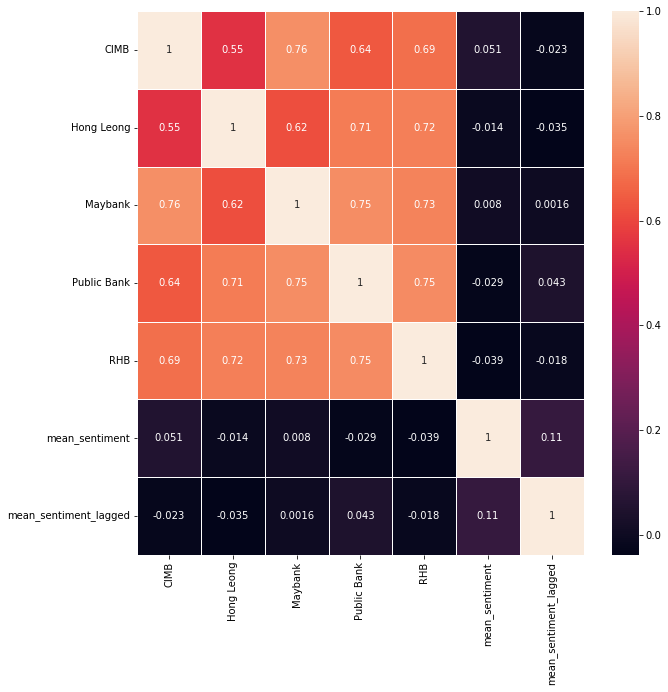

In [35]:
sentiment_price_corr(finance_data)

In [3]:
consumer_data = pd.read_excel(r"Data/sentiment_result/Consumer_sentiment_overview.xlsx", sheet_name="Overall")

In [4]:
start = dt.datetime(2020,1,1)
end = dt.datetime(2020,12,31)

consumer_data = consumer_data[(consumer_data['Date'] >= start) & (consumer_data['Date'] <= end)]
consumer_data = consumer_data.set_index('Date')
consumer_data.head()

,F&N,Hap Seng,Nestle,QL Resource,PPB,mean_sentiment,mean_sentiment_lagged
Date,,,,,,,
2020-01-02,-1.377724,0.000000,0.000000,-1.353033,-0.106160,-0.108163,-0.137789
2020-01-03,0.640263,0.000000,0.068042,0.997520,0.743901,-0.146567,0.104555
2020-01-06,-0.809704,-0.801590,-0.407875,-0.493829,-0.949363,0.103325,-0.298277
2020-01-09,0.296741,-0.201610,-0.889208,0.247823,-0.426420,0.015169,-0.025946
2020-01-14,0.000000,-0.304255,0.068663,0.122855,0.000000,0.298392,0.016045


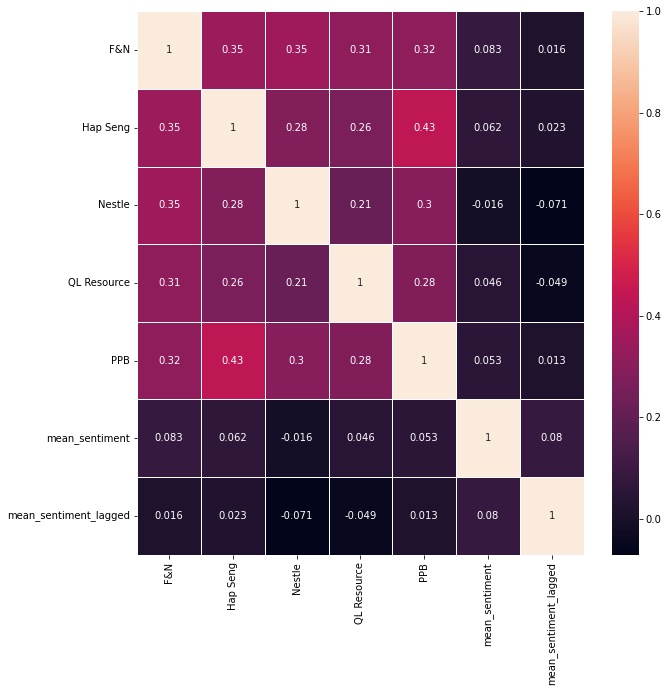

In [5]:
sentiment_price_corr(consumer_data)